In [1]:
import numpy as np
import qutip as qt
import matplotlib.pyplot as plt

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
#Defining time scales
gate_time = 10.0
gate_steps = 1000

#Defining H0
qubit_state_num = 2
qubit_num = 1
freq_ge = 3.9#GHz
g = 0.2 #GHz

ens = np.array([ 2*np.pi*ii*(freq_ge) for ii in np.arange(qubit_state_num)])
Q_x   = np.diag(np.sqrt(np.arange(1,qubit_state_num)),1)+np.diag(np.sqrt(np.arange(1,qubit_state_num)),-1)
Q_y   = (0+1j) *(np.diag(np.sqrt(np.arange(1,qubit_state_num)),1)-np.diag(np.sqrt(np.arange(1,qubit_state_num)),-1))
Q_z   = np.diag(np.arange(0,qubit_state_num))
I_q = np.identity(qubit_state_num)
H_q = np.diag(ens)


H0 = H_q
Hops = [Q_x]

initial_vector = np.array([1,0])


# initial vector
psi0 = qt.Qobj(initial_vector)

# H0 and Hops
H0_qobj = qt.Qobj(H0)
Hops_qobj = []

for Hop in Hops:
    Hops_qobj.append(qt.Qobj(Hop))
        
# define time    
tlist = np.linspace(0,gate_time,gate_steps+1)
dt = gate_time/gate_steps

# define uks
half_pi_length = 81 * dt
pi_length = 160 * dt

idle = 7

# uks_x = (2.0*np.sin(2*np.pi*freq_ge*tlist))

uks_x = (2.0*np.sin(2*np.pi*freq_ge*tlist))*(tlist< half_pi_length)
uks_x += (2.0*np.sin(2*np.pi*freq_ge*tlist))*(idle<tlist) * (tlist < (idle+ half_pi_length))





averages = 1

# looping over each initial vector
for avg in range(averages):
    
    print "On iteration: %d" %(avg)
    
    uks = np.array([uks_x])
    
    
    # make functions to return uks field
    def make_get_uks_func(id):
        def _function(t,args=None):
            time_id = int(t/dt)
            return uks[id][time_id]
        return _function
    
    # create the time-dependent Hamiltonian list
    Ht_list = []
    Ht_list.append(H0_qobj)
    for ii in range(len(Hops)):
        Ht_list.append([Hops_qobj[ii],make_get_uks_func(ii)])
    
    # solving the Schrodinger evolution in QuTiP's sesolve
    output = qt.sesolve(Ht_list, psi0, tlist, [])
    
    # obtaining the simulation result
    state_tlist = []
    for state in output.states:
        state_tlist.append(state.full())
    state_tlist = np.array(state_tlist)[:,:,0]
    state_tlist = np.transpose(state_tlist)
    
    print state_tlist.shape
    
    

On iteration: 0
(2, 1001)


In [3]:
P_e = np.conjugate(state_tlist[1,:])*state_tlist[1,:]

/usr/local/lib/python2.7/dist-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


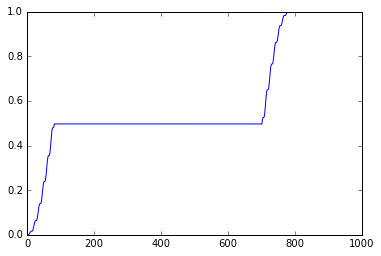

In [4]:
plt.plot(P_e)

In [ ]:
idx = (np.abs(P_e[:200]-1.0)).argmin()

print idx